# Author: Shubham Agarwal
Learning with the spark foundation

Task 5: Exporatory Data Analysis : Sports
In this task we have to Perform ‘Exploratory Data Analysis’ on dataset ‘Indian Premier League’.

As a sports analysts, find out the most successful teams, players and factors,contributing win or loss of a team.

In [19]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
deliveries_data = pd.read_csv("C:/Users/shubh/OneDrive/Desktop/panduu/The Spark Foundation/Indian Premier League/deliveries.csv")

In [21]:
matches_data = pd.read_csv("C:/Users/shubh/OneDrive/Desktop/panduu/The Spark Foundation/Indian Premier League/matches.csv")

In [22]:
# merging the dataset
merge_df = pd.merge(deliveries_data,matches_data, left_on='match_id',right_on='id')
merge_df.head()



,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN


In [23]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179078 entries, 0 to 179077
Data columns (total 39 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [24]:
merge_df.isna().any()

match_id            False
inning              False
batting_team        False
bowling_team        False
over                False
ball                False
batsman             False
non_striker         False
bowler              False
is_super_over       False
wide_runs           False
bye_runs            False
legbye_runs         False
noball_runs         False
penalty_runs        False
batsman_runs        False
extra_runs          False
total_runs          False
player_dismissed     True
dismissal_kind       True
fielder              True
id                  False
season              False
city                 True
date                False
team1               False
team2               False
toss_winner         False
toss_decision       False
result              False
dl_applied          False
winner               True
win_by_runs         False
win_by_wickets      False
player_of_match      True
venue               False
umpire1              True
umpire2              True
umpire3     

In [25]:
merge_df.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
id                       0
season                   0
city                  1700
date                     0
team1                    0
team2                    0
toss_winner              0
toss_decision            0
result                   0
dl_applied               0
winner                 372
win_by_runs              0
win_by_wickets           0
player_of_match        372
venue                    0
umpire1                500
u

In [26]:
merge_df.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,id,season,dl_applied,win_by_runs,win_by_wickets
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897,1802.252957,2013.444510,0.017914,13.404036,3.261579
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422,3472.322805,3.363947,0.132639,23.261007,3.347033
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,190.000000,2011.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,379.000000,2013.000000,0.000000,0.000000,3.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,567.000000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000,11415.000000,2019.000000,1.000000,146.000000,10.000000


C:\Users\shubh\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


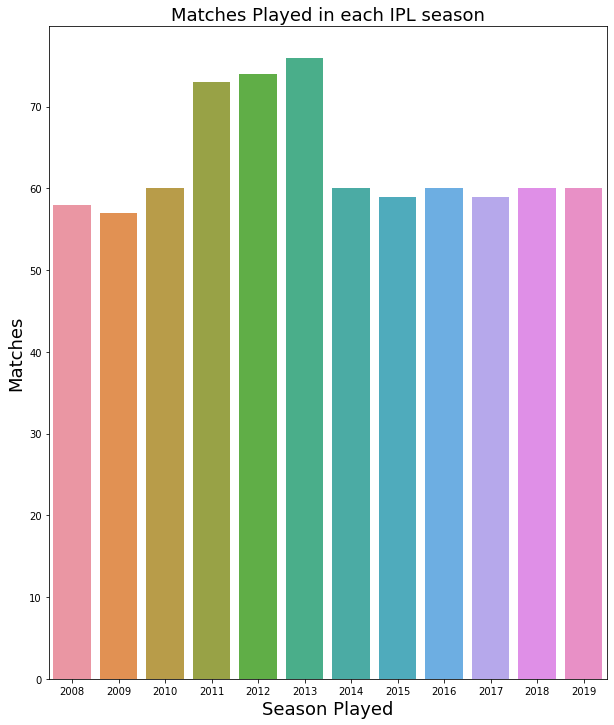

In [27]:

plt.figure(figsize = (10,12))
sns.countplot('season' , data= matches_data,)
plt.xlabel("Season Played" , fontsize = 18)
plt.ylabel("Matches" , fontsize = 18)
plt.title('Matches Played in each IPL season', fontsize = 18)
plt.show()

C:\Users\shubh\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


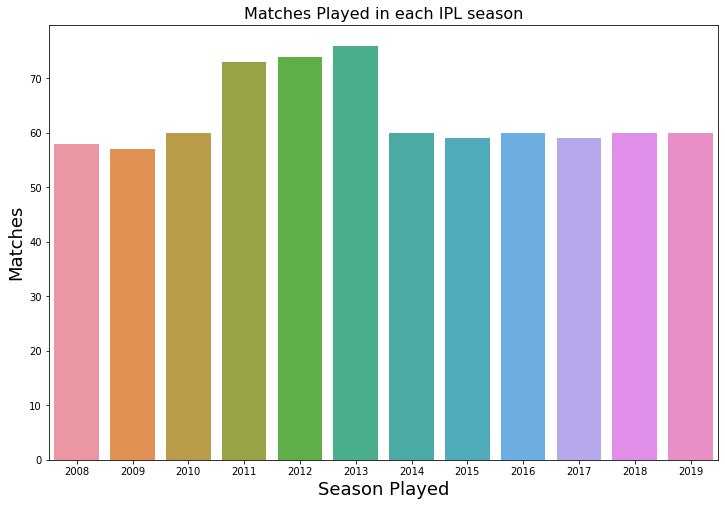

In [28]:
plt.figure(figsize =(12,8))
sns.countplot('season', data = matches_data)
plt.xlabel("Season Played" , fontsize = 18)
plt.ylabel("Matches" , fontsize = 18)
plt.title('Matches Played in each IPL season', fontsize= 16)
plt.show()

C:\Users\shubh\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


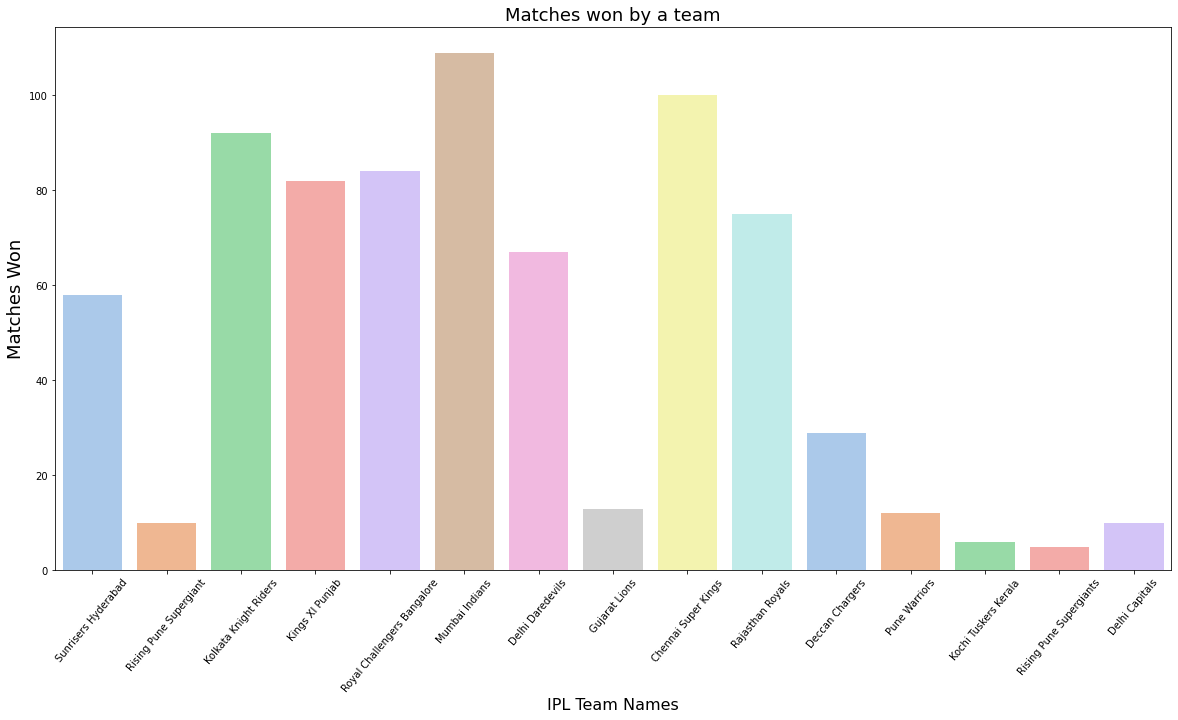

In [29]:
plt.figure(figsize= (20,10))
sns.countplot('winner', data = matches_data, palette ='pastel')
plt.xlabel("IPL Team Names", fontsize = 16)
plt.xticks(rotation= 50)
plt.ylabel("Matches Won", fontsize= 18)
plt.title("Matches won by a team", fontsize= 18)
plt.show()

From the above bar graph we can say that most of the matches in IPl session won by the Mumbai Indians, Chennai Super kings, Kolkata Kings Knightriders
where 
1st = Mumbai Indians,
2nd - CSK,
3rd = KKR


Now lets visualise the number of matches played in most of the venues
so graph between the venues and the count


C:\Users\shubh\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


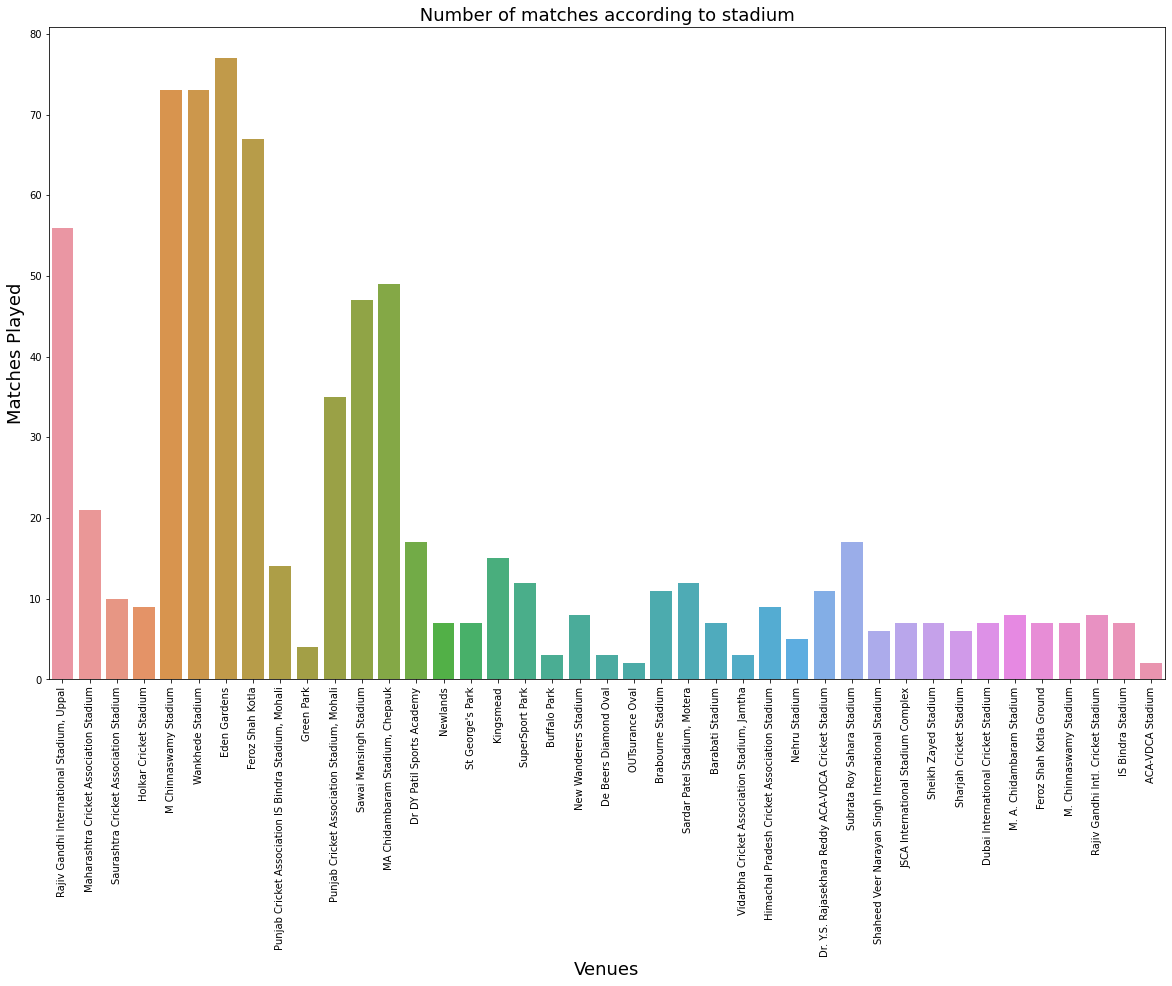

In [30]:
plt.figure(figsize= (20,12))
sns.countplot('venue', data = matches_data)
plt.xlabel("Venues", fontsize = 18)
plt.xticks(rotation = 90)
plt.ylabel("Matches Played", fontsize =18)
plt.title(" Number of matches according to stadium ", fontsize=18)
plt.show()

from the above graph we can conclude that most of the matches were played in the 'Eden gardens'

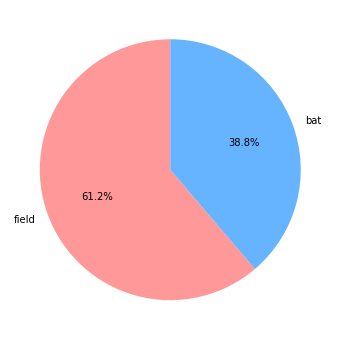

In [31]:
plt.figure(figsize=(6,6))
sizes = matches_data.toss_decision.value_counts()
labels = matches_data.toss_decision.value_counts().index
plt.pie(sizes,colors = ['#ff9999','#66b3ff'],
         labels=labels,
         autopct='%1.1f%%',
         startangle=90,)
plt.show()

From the above graph we conclude that most teams decided to field

Team Decision to Bat or Field

C:\Users\shubh\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


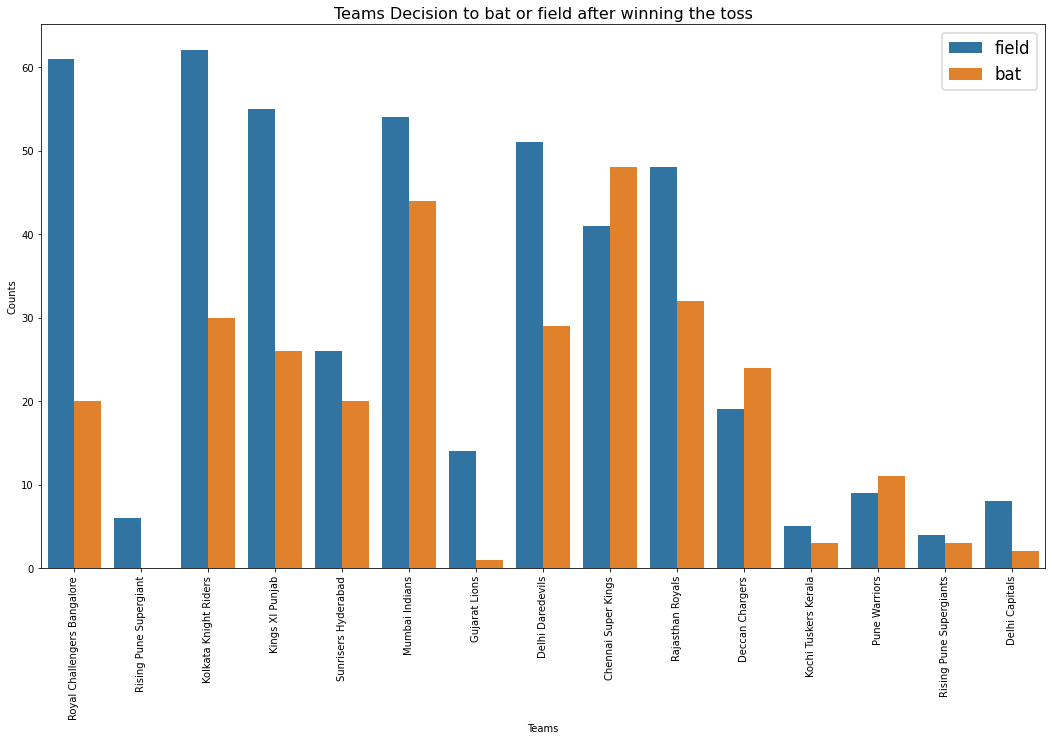

In [32]:
plt.figure(figsize=(18,10))
sns.countplot('toss_winner' , data=matches_data , hue='toss_decision')

sns.set_context('talk')
plt.xlabel('Teams')
plt.xticks(rotation = 90)
plt.ylabel('Counts')
plt.title('Teams Decision to bat or field after winning the toss', size = 16)
plt.legend(loc=1)
plt.show()

From the above graph we conclude that Royal Challengers Bangeluru chose to field more than to bat.
And Chennai Super Kings choose Bat more than to field


Player of the match

C:\Users\shubh\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Player of the match Bar graph')

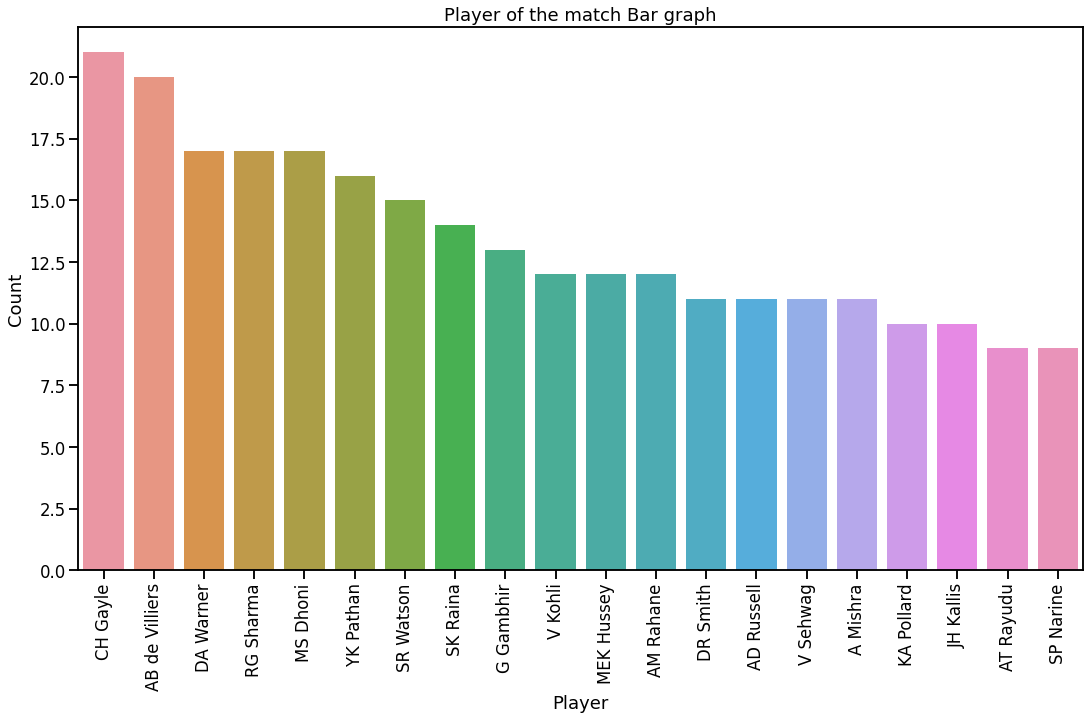

In [33]:
plt.figure(figsize = (18,10))
match_player= matches_data['player_of_match'].value_counts()[:20]
sns.barplot(match_player.index, match_player.values)
sns.set_context('talk')
plt.xlabel('Player', fontsize= 18)
plt.xticks(rotation= 90)
plt.ylabel('Count', fontsize= 18)
plt.title('Player of the match Bar graph', fontsize = 18)

from the above graph we can cpnclude that Chris Gayle was the most time of player of the match in IPL season since 2008 
and then ABD is on Second Position



Total Runs in IPL season without ascending or descemding order sorting

(array([    0.,  5000., 10000., 15000., 20000., 25000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

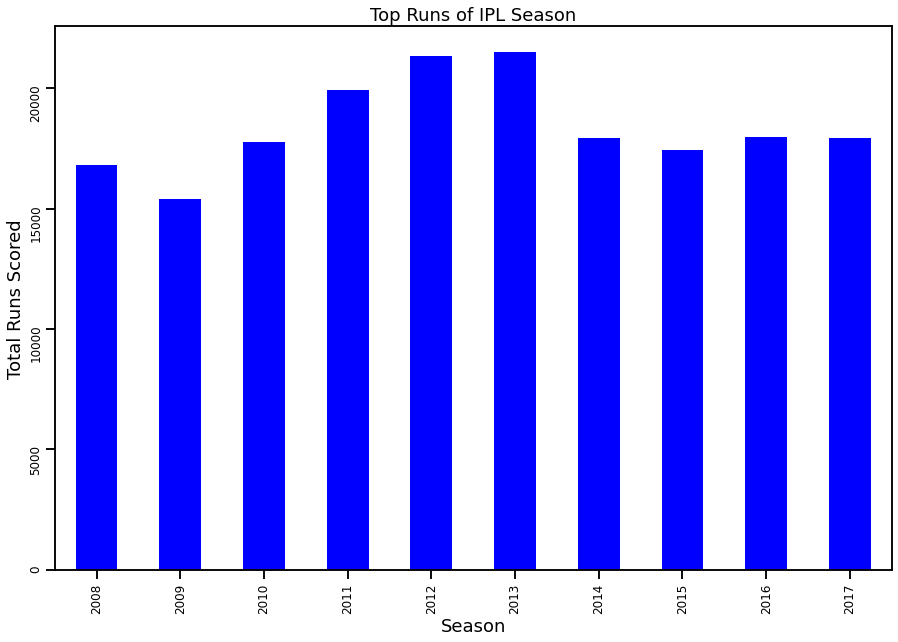

In [34]:
plt.figure(figsize = (15,10))
merge_df.groupby('season')['batsman_runs'].sum().head(10).plot(kind = 'bar',color= 'b')
plt.title("Top Runs of IPL Season", fontsize =18)
plt.xlabel("Season")
plt.ylabel("Total Runs Scored")
plt.xticks(size = 12)
plt.yticks(size = 12, rotation = 90)



From the above graph we conclude that most of the runs were scored during the season 2013 and season 2012

Total Runs of each batsman in IPL Season 


Text(0.5, 1.0, 'total runs scored by each batsman in The Entire IPL Season')

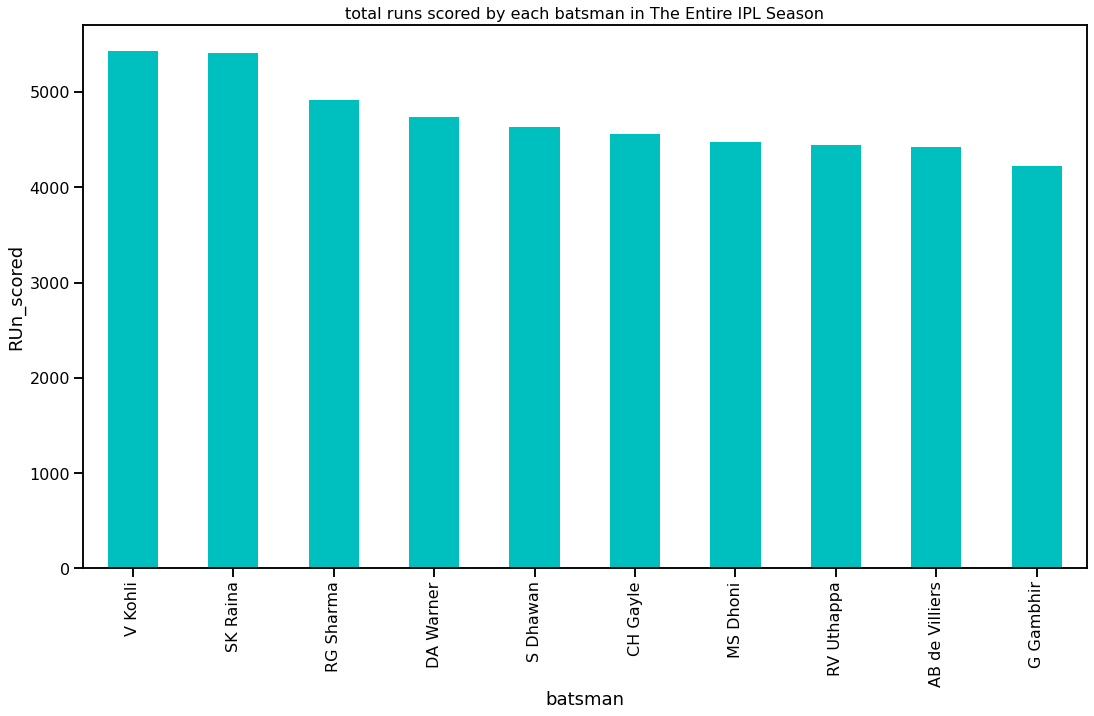

In [35]:
plt.figure(figsize =(18,10))
merge_df.groupby('batsman')['batsman_runs'].sum().sort_values(ascending= False).head(10).plot(kind= 'bar', color='c')
plt.xlabel('batsman', fontsize = 18)
plt.ylabel('RUn_scored', fontsize=18)
plt.xticks(fontsize =16)
plt.yticks(fontsize =16)
plt.title("total runs scored by each batsman in The Entire IPL Season", fontsize =16)


Top wicket takers of IPL

Text(0.5, 1.0, 'total runs scored by each batsman in The Entire IPL Season')

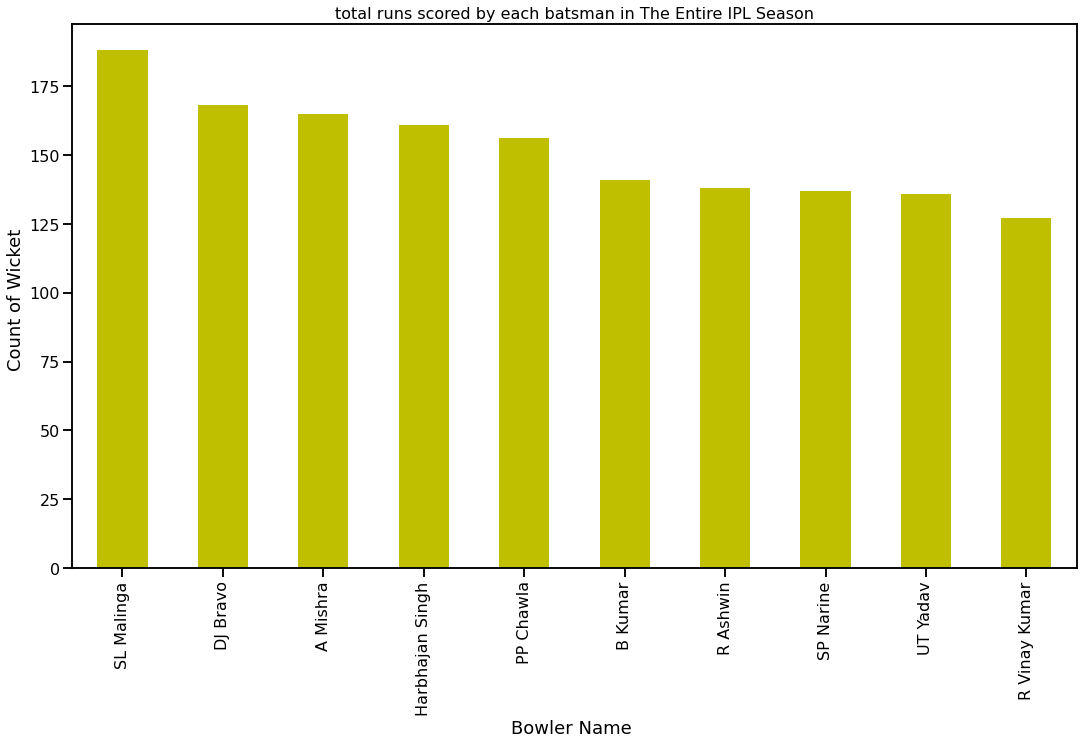

In [36]:
plt.figure(figsize =(18,10))

merge_df.groupby('bowler')['player_dismissed'].count().sort_values(ascending = False).head(10).plot(kind = 'bar', color = 'y')
plt.xlabel('Bowler Name ', fontsize = 18)
plt.ylabel('Count of Wicket ', fontsize=18)
plt.xticks(fontsize =16)
plt.yticks(fontsize =16)
plt.title("total runs scored by each batsman in The Entire IPL Season", fontsize =16)


From the above the bar chart we can easily say that SL malinga is the top performer in Wicket taker after that DJ Bravo

Nw all the analysis is completed for the IPl DataSet.
Thank You.


If you guys have any suggestions or questions feel free to share with me.
I am happy to get it touch with Data Enthusist People
My Mail id - shubhamagarwal7219@gmail.com 

Thanks!!